In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [2]:
stp = pd.read_csv('StudentsPerformance.csv')

In [3]:
stp.head()

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score
0,female,group B,bachelor's degree,standard,none,72,72,74
1,female,group C,some college,standard,completed,69,90,88
2,female,group B,master's degree,standard,none,90,95,93
3,male,group A,associate's degree,free/reduced,none,47,57,44
4,male,group C,some college,standard,none,76,78,75


# Exploratory data analysis

In [4]:
stp.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column                       Non-Null Count  Dtype 
---  ------                       --------------  ----- 
 0   gender                       1000 non-null   object
 1   race/ethnicity               1000 non-null   object
 2   parental level of education  1000 non-null   object
 3   lunch                        1000 non-null   object
 4   test preparation course      1000 non-null   object
 5   math score                   1000 non-null   int64 
 6   reading score                1000 non-null   int64 
 7   writing score                1000 non-null   int64 
dtypes: int64(3), object(5)
memory usage: 62.6+ KB


In [5]:
stp.describe()

,math score,reading score,writing score
count,1000.00000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000
std,15.16308,14.600192,15.195657
min,0.00000,17.000000,10.000000
25%,57.00000,59.000000,57.750000
50%,66.00000,70.000000,69.000000
75%,77.00000,79.000000,79.000000
max,100.00000,100.000000,100.000000


#  Univariate Analysis

In [6]:
stp_index = stp['gender'].value_counts().index
stp_value = stp['gender'].value_counts().values

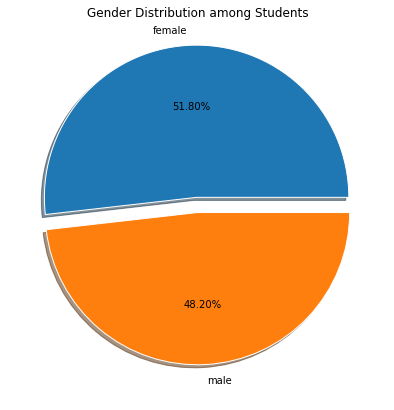

In [7]:
plt.figure(figsize=(10,7))
plt.pie(stp_value,labels=stp_index,autopct='%0.2f%%',wedgeprops={'edgecolor':'white'},shadow=True,explode=[0.1,0])
plt.title('Gender Distribution among Students')
plt.show()

female students are greater than male students,female=512,male=482

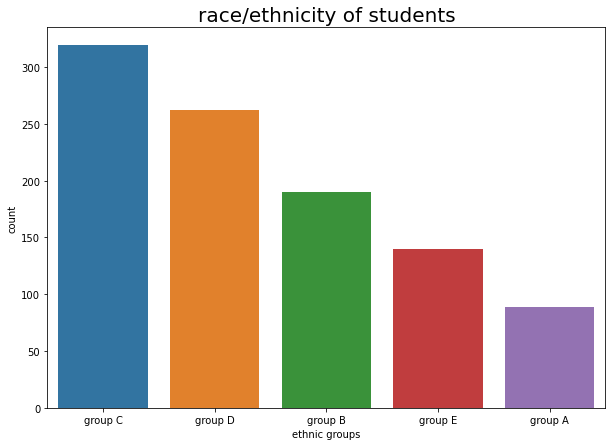

In [8]:
plt.figure(figsize=(10,7))
race=stp['race/ethnicity'].value_counts()
sns.barplot(x=race.index, y=race.values, data=stp)
sns.set_context('notebook')
plt.xlabel('ethnic groups')
plt.ylabel('count')
plt.title('race/ethnicity of students', fontsize=20)
plt.show()

A large number of the students belong to the "Group C" ethnic group followed by "Group B". "Group A" constitute the least number of students.

In [9]:
stp['parental level of education'].value_counts()

some college          226
associate's degree    222
high school           196
some high school      179
bachelor's degree     118
master's degree        59
Name: parental level of education, dtype: int64

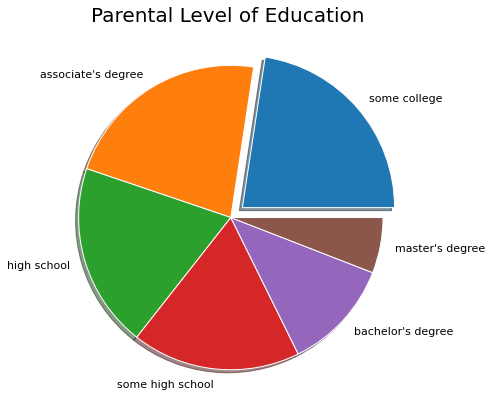

In [10]:
plt.figure(figsize=(10,7))
parent = stp['parental level of education'].value_counts()
plt.pie(parent,labels=parent.index,shadow=True,explode=[0.1,0,0,0,0,0],wedgeprops={'edgecolor':'white'})
plt.title('Parental Level of Education ',size=20)
plt.show()

Most of the parents attended some college while very few have master's degree.

In [11]:
stp['test preparation course'].value_counts()

none         642
completed    358
Name: test preparation course, dtype: int64

Of all the students, only 358 took the test preparation course.

In [12]:
stp['lunch'].value_counts()

standard        645
free/reduced    355
Name: lunch, dtype: int64

A larger number of the student took the standard lunch type.

# Multivariate Analysis

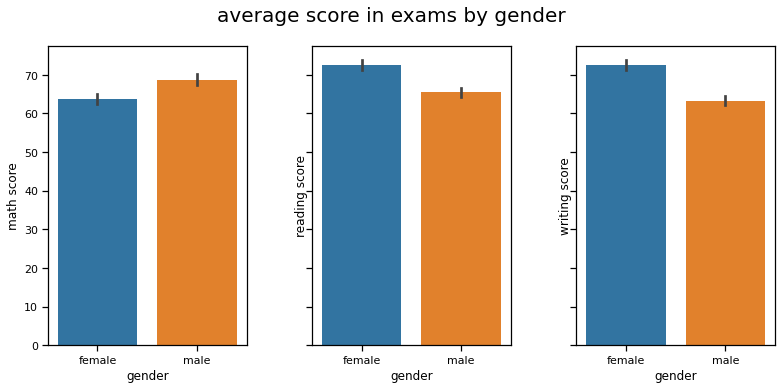

In [13]:
stp.pivot_table(values=['math score','reading score','writing score'],index='gender').reset_index
fig, axes=plt.subplots(1,3,sharey=True, figsize=(12,6))
sns.barplot(ax=axes[0],x='gender',y='math score',data=stp)
sns.barplot(ax=axes[1],x='gender',y='reading score',data=stp)
sns.barplot(ax=axes[2],x='gender',y='writing score',data=stp)
plt.tight_layout(pad=4.0)
fig.suptitle('average score in exams by gender', fontsize=20)
plt.show()

The male students are good at maths while female students are good at reading and writing.

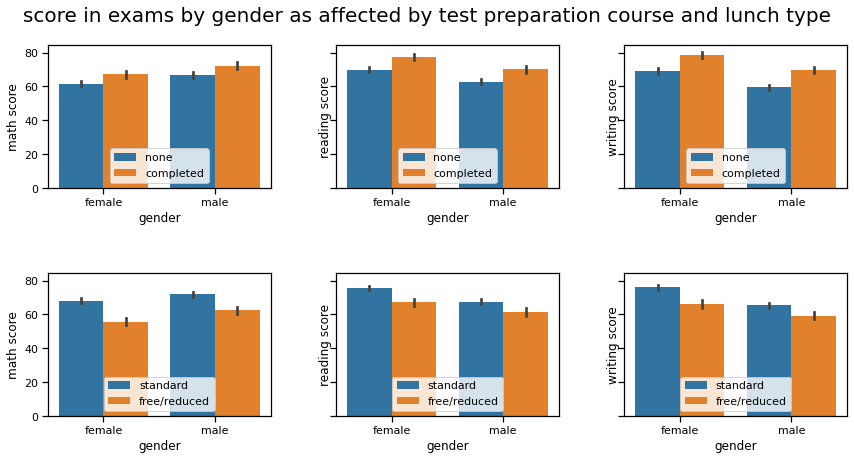

In [14]:
fig, axes = plt.subplots(2,3,sharey=True, figsize=(13,7))
sns.barplot(ax=axes[0,0],x='gender',y='math score',hue='test preparation course',data=stp)
sns.barplot(ax=axes[0,1],x='gender',y='reading score',hue='test preparation course',data=stp)
sns.barplot(ax=axes[0,2],x='gender',y='writing score',hue='test preparation course',data=stp)
sns.barplot(ax=axes[1,0],x='gender',y='math score',hue='lunch',data=stp)
sns.barplot(ax=axes[1,1],x='gender',y='reading score',hue='lunch',data=stp)
sns.barplot(ax=axes[1,2],x='gender',y='writing score',hue='lunch',data=stp)

plt.tight_layout(pad=4.0)
fig.suptitle('score in exams by gender as affected by test preparation course and lunch type',fontsize=20)
axes[0,0].legend(loc='lower center')
axes[0,1].legend(loc='lower center')
axes[0,2].legend(loc='lower center')
axes[1,0].legend(loc='lower center')
axes[1,1].legend(loc='lower center')
axes[1,2].legend(loc='lower center')
plt.show()

It represents score in exams by gender as affected by test preparation course and lunch type.

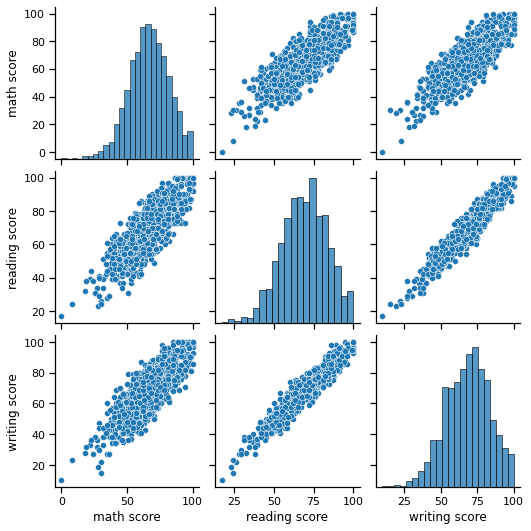

In [15]:
sns.pairplot(stp)

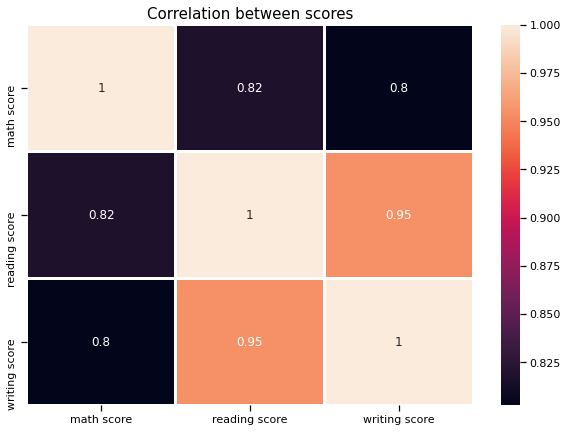

In [16]:
corn = stp.corr()
plt.figure(figsize=(10,7))
sns.heatmap(corn,data=stp,annot=True,linecolor='white',linewidths=2)
plt.title('Correlation between scores',fontsize=15)
plt.show()

The pairplot and heatmap plot explains the relationship between the scores.There is a high corellation between scores, students who performed well in any one of the exams also performed well in the other exams and vice versa. So instead of looking at individual scores, let sum up the scores and find out the effects of each of the variables on the total score.

In [17]:
stp['Total Score'] = stp['math score'] + stp['reading score'] + stp['writing score']
stp

,gender,race/ethnicity,parental level of education,lunch,test preparation course,math score,reading score,writing score,Total Score
0,female,group B,bachelor's degree,standard,none,72,72,74,218
1,female,group C,some college,standard,completed,69,90,88,247
2,female,group B,master's degree,standard,none,90,95,93,278
3,male,group A,associate's degree,free/reduced,none,47,57,44,148
4,male,group C,some college,standard,none,76,78,75,229
...,...,...,...,...,...,...,...,...,...
995,female,group E,master's degree,standard,completed,88,99,95,282
996,male,group C,high school,free/reduced,none,62,55,55,172
997,female,group C,high school,free/reduced,completed,59,71,65,195
998,female,group D,some college,standard,completed,68,78,77,223


In [18]:
stp.describe()

,math score,reading score,writing score,Total Score
count,1000.00000,1000.000000,1000.000000,1000.000000
mean,66.08900,69.169000,68.054000,203.312000
std,15.16308,14.600192,15.195657,42.771978
min,0.00000,17.000000,10.000000,27.000000
25%,57.00000,59.000000,57.750000,175.000000
50%,66.00000,70.000000,69.000000,205.000000
75%,77.00000,79.000000,79.000000,233.000000
max,100.00000,100.000000,100.000000,300.000000


In [19]:
gender = stp.groupby('gender')['Total Score'].mean()
gender

gender
female    208.708494
male      197.512448
Name: Total Score, dtype: float64

In [20]:
data = pd.DataFrame()
data['gender'] = gender.index
data['Avg_gender_score'] = gender.values
data

,gender,Avg_gender_score
0,female,208.708494
1,male,197.512448


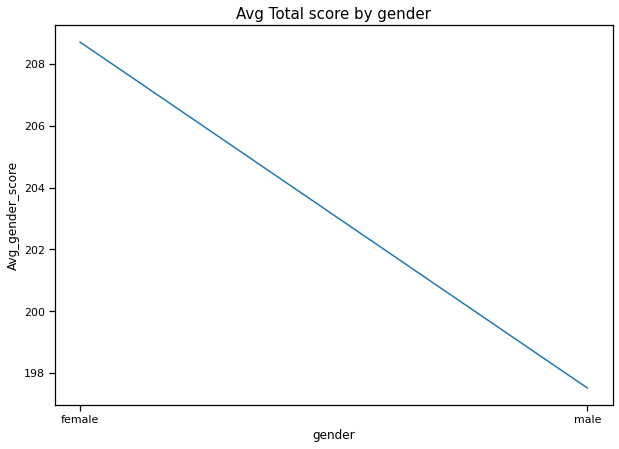

In [21]:
plt.figure(figsize=(10,7))
sns.lineplot(x = gender.index,y = 'Avg_gender_score',data = data)
plt.title('Avg Total score by gender',fontsize=15)
plt.show()

Female Students perform better than Male students.

In [22]:
cnd = stp.groupby('race/ethnicity')['Total Score'].max()
opd = cnd.head()
opd

race/ethnicity
group A    289
group B    290
group C    296
group D    297
group E    300
Name: Total Score, dtype: int64

In [23]:
rec = pd.DataFrame()
rec['Race'] = opd.index
rec['Total Score'] = opd.values
rec

,Race,Total Score
0,group A,289
1,group B,290
2,group C,296
3,group D,297
4,group E,300


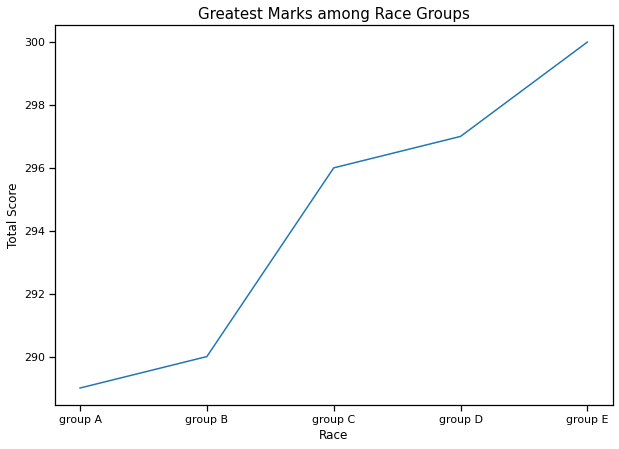

In [24]:
plt.figure(figsize=(10,7))
sns.lineplot(x = 'Race',y = 'Total Score',data=rec)
plt.title('Greatest Marks among Race Groups',fontsize=15)
plt.show()


Why did students in 'Group E' performed better than others? Let's find out..

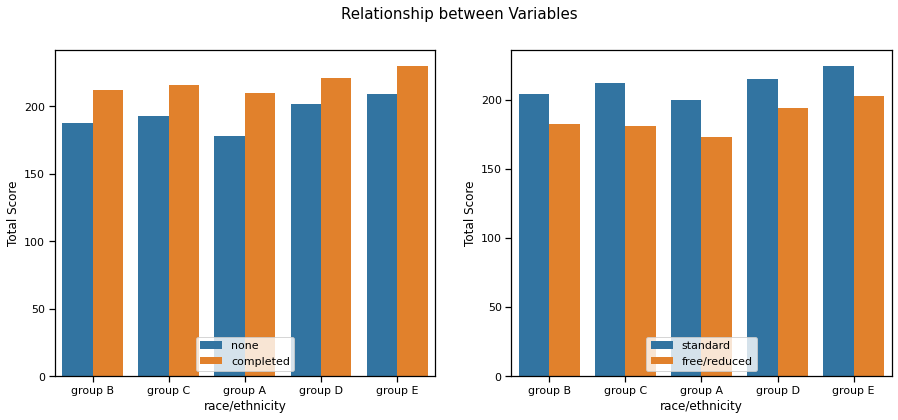

In [25]:
fig, axes=plt.subplots(1, 2,figsize=(15,6))
sns.barplot(ax=axes[0],x = 'race/ethnicity', y = 'Total Score',hue='test preparation course',data=stp,ci=None,)
sns.barplot(ax=axes[1],x = 'race/ethnicity', y = 'Total Score',hue='lunch',data=stp,ci=None)
fig.suptitle('Relationship between Variables',fontsize=15)

axes[0].legend(loc='lower center')
axes[1].legend(loc='lower center')
plt.show()

The "Group E" ethnic group has the highest number of students who completed the test preparation course, as well as took the standard lunch type as compared to other groups thus, they performed better.

# Conclusions

1.Gender

(i) There are more females than males among the students.

(ii) Female students performed averagely better in math than the male students.

(iii)Male students performed better in the reading and writing exams than females.

(iv)However, the overall score shows that averagely, the female students performed better than the male students.

2. Race/Ethnicity

(i) A large number of the students belong to the "Group c" ethnic group followed by "Group B". "Group A" constitute the least number of students.

(ii)Students belonging to "Group E" performed better than others.

3.Parental level of Education

Most of the parents attended some college while very few have master's degree.

4.Lunch

A large number of the students took the "standard" lunch type

5.Test Preparation Course

(i) Students who completed the test preparation course performed averagely better than does who did not.

(ii) Students who complete a test preparation course, and take a standard lunch type have a better chance of getting high scores than others.